In [5]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [7]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [8]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


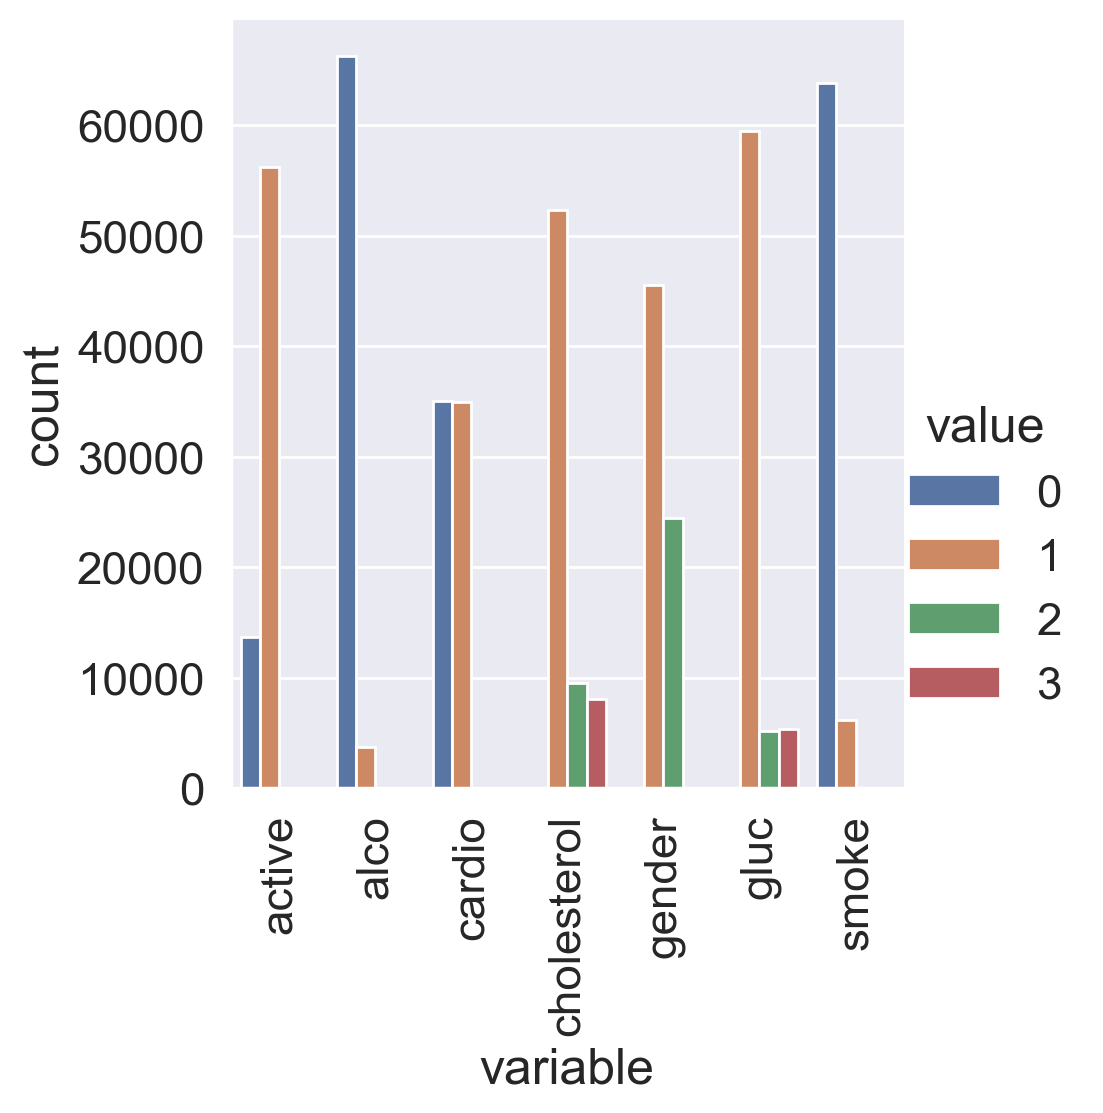

In [9]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

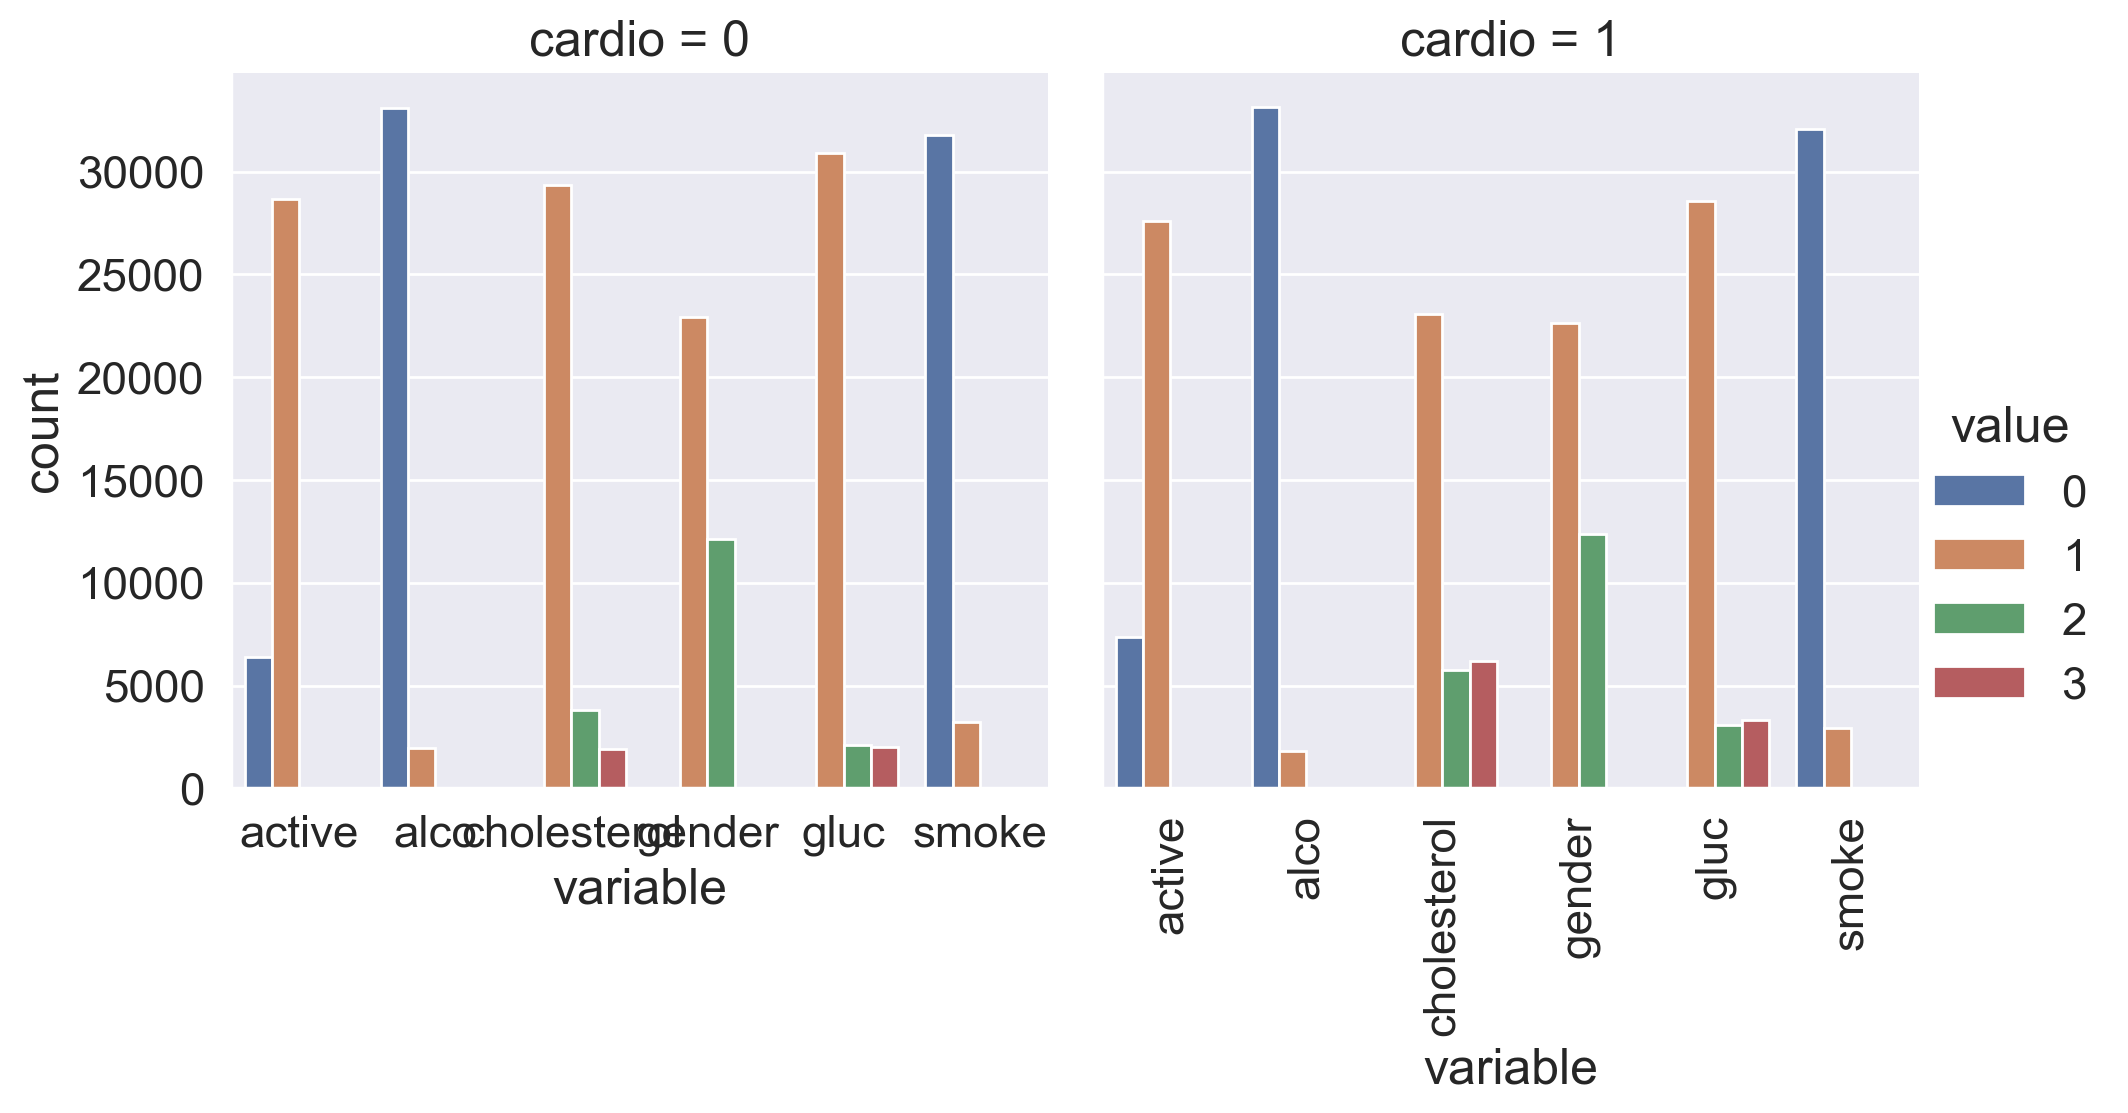

In [10]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

In [11]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


### 1.1. Basic observations

In [12]:
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [13]:
df.groupby("gender")["alco"].value_counts()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: alco, dtype: int64

In [14]:
df.groupby("gender")['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [15]:
round(100*(df.loc[df['gender']==2, 'smoke'].mean()-df.loc[df['gender']==1, 'smoke'].mean()))

20

In [16]:
(df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median()) / 365.25 * 12

19.613963039014372

### 1.2. Risk map

In [17]:
age_years = df['age']/365.25
age_years

0        50.357290
1        55.381246
2        51.627652
3        48.249144
4        47.841205
           ...    
69995    52.676249
69996    61.878166
69997    52.199863
69998    61.412731
69999    56.235455
Name: age, Length: 70000, dtype: float64

In [18]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")

In [19]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]

In [20]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

0.2631578947368421

In [21]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
]["cardio"].mean()

0.8636363636363636

### 1.3. Analyzing BMI

In [22]:
bmi = df['weight'] / pow(2, df['height'] / 100)
bmi

0        19.349124
1        28.827842
2        20.392970
3        25.414008
4        18.992461
           ...    
69995    23.718280
69996    42.144718
69997    29.532785
69998    23.262351
69999    22.160599
Length: 70000, dtype: float64

In [23]:
df['bmi'] = df['weight'] / (df['height'] / 100)**2

In [24]:
df['bmi'].median()

26.374068120774975

In [25]:
df.groupby('gender')['bmi'].median()

gender
1    26.709402
2    25.910684
Name: bmi, dtype: float64

In [26]:
df.groupby(["gender", "alco", "cardio"])["bmi"].median().to_frame()

bmi
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

### 1.4. Cleaning data

In [27]:
?pd.Series.quantile

In [28]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(df_to_remove.shape[0] / df.shape[0])

filtered_df = df[~df.index.isin(df_to_remove)]

0.0963


### 2.1. Correlation matrix visualization

<Axes: >

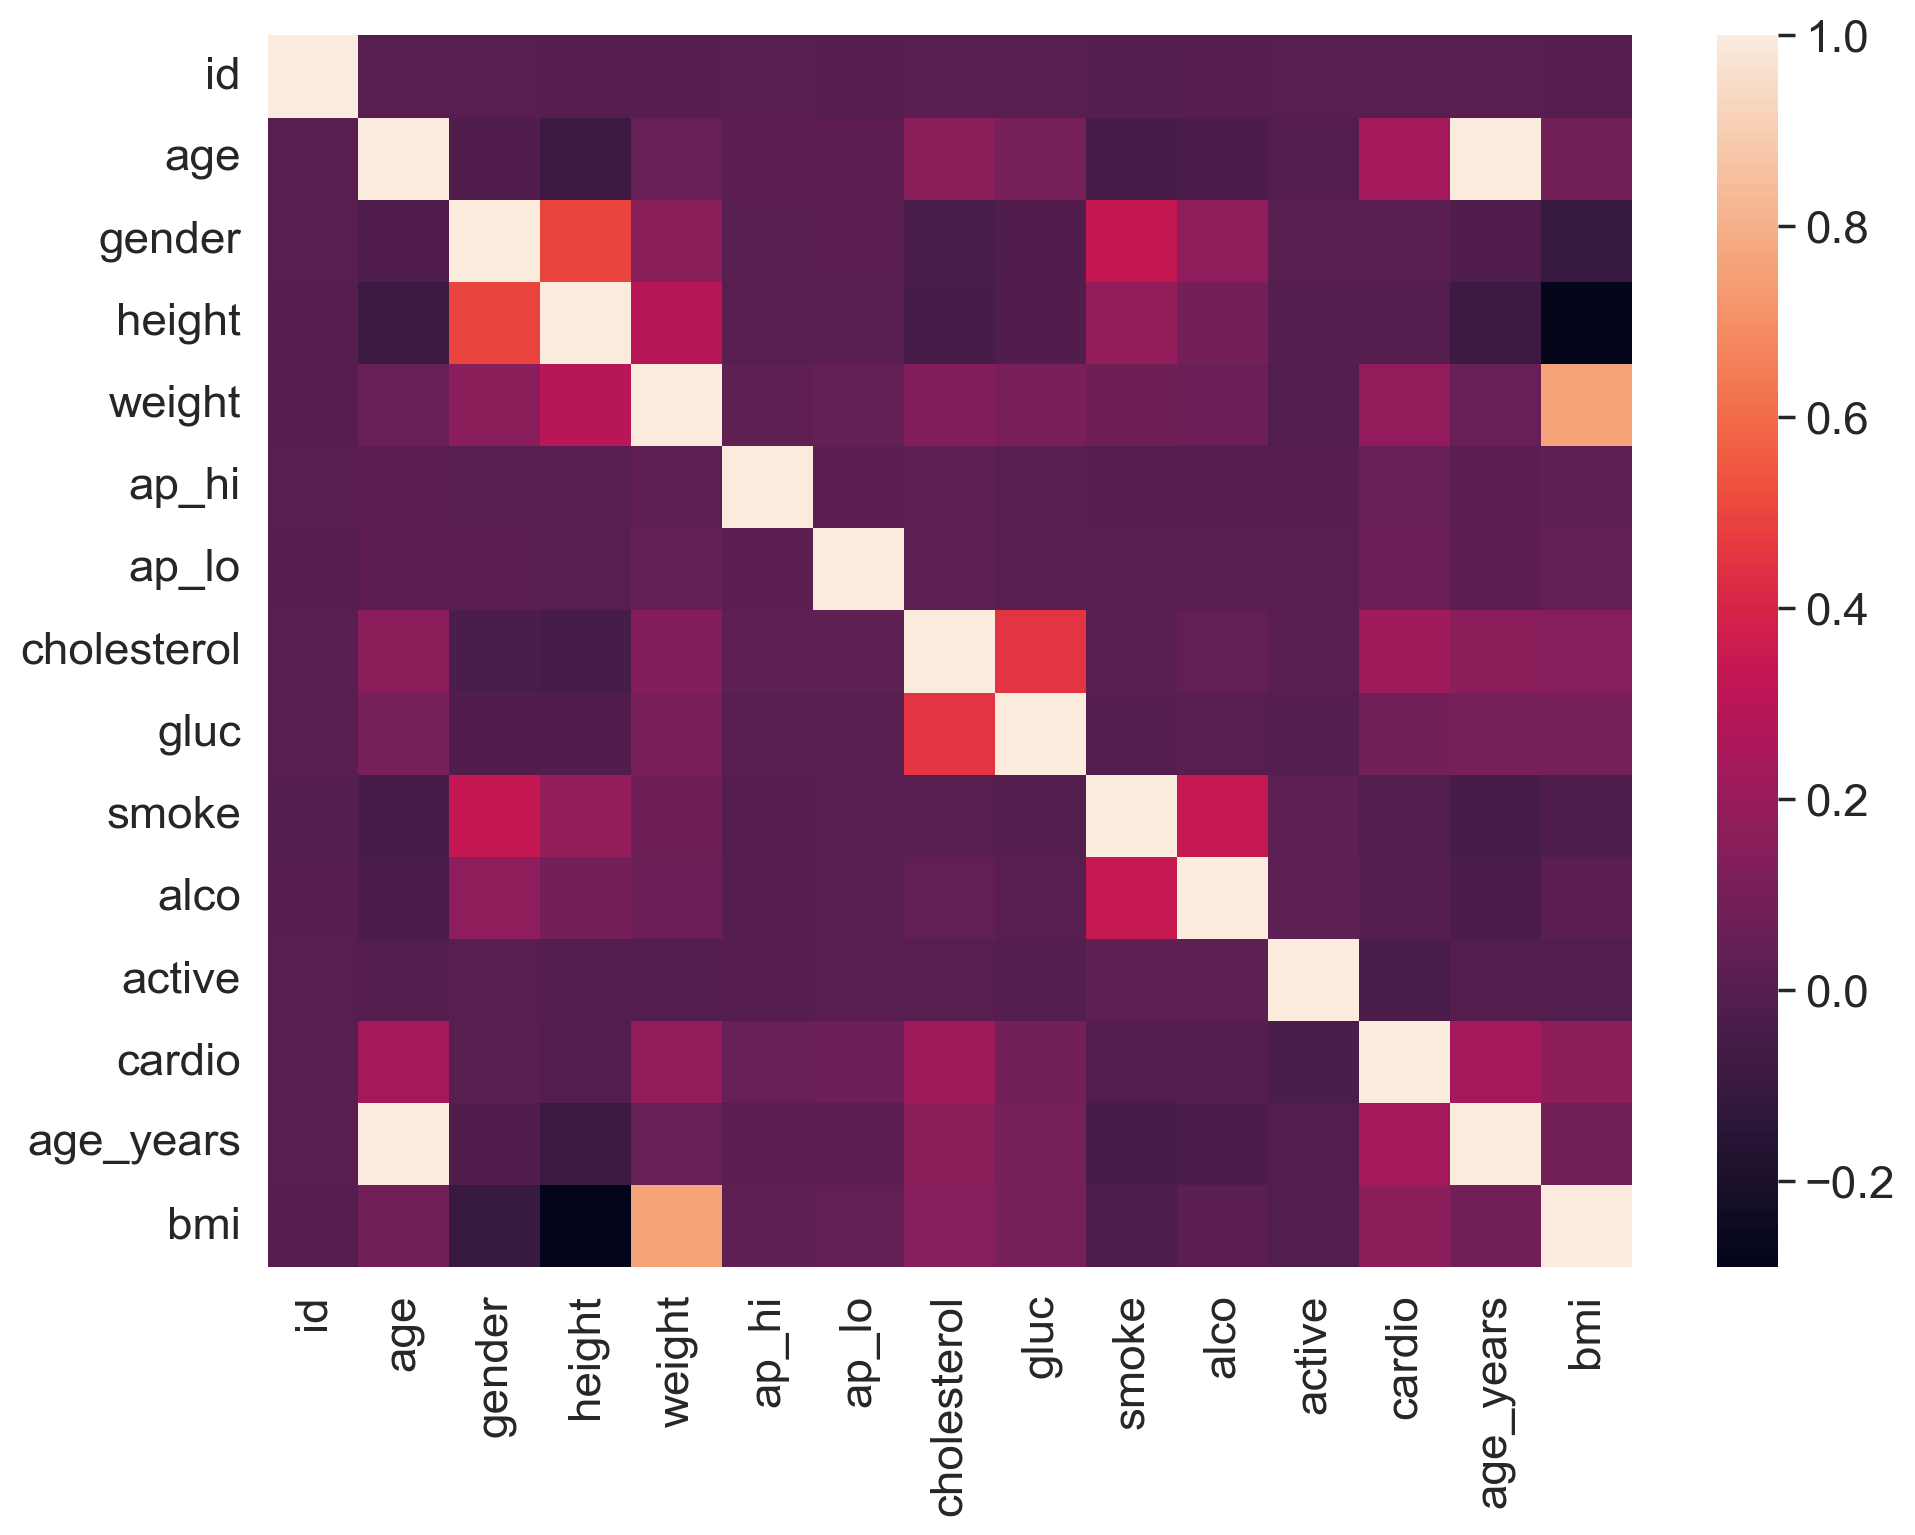

In [29]:
sns.heatmap(filtered_df.corr())

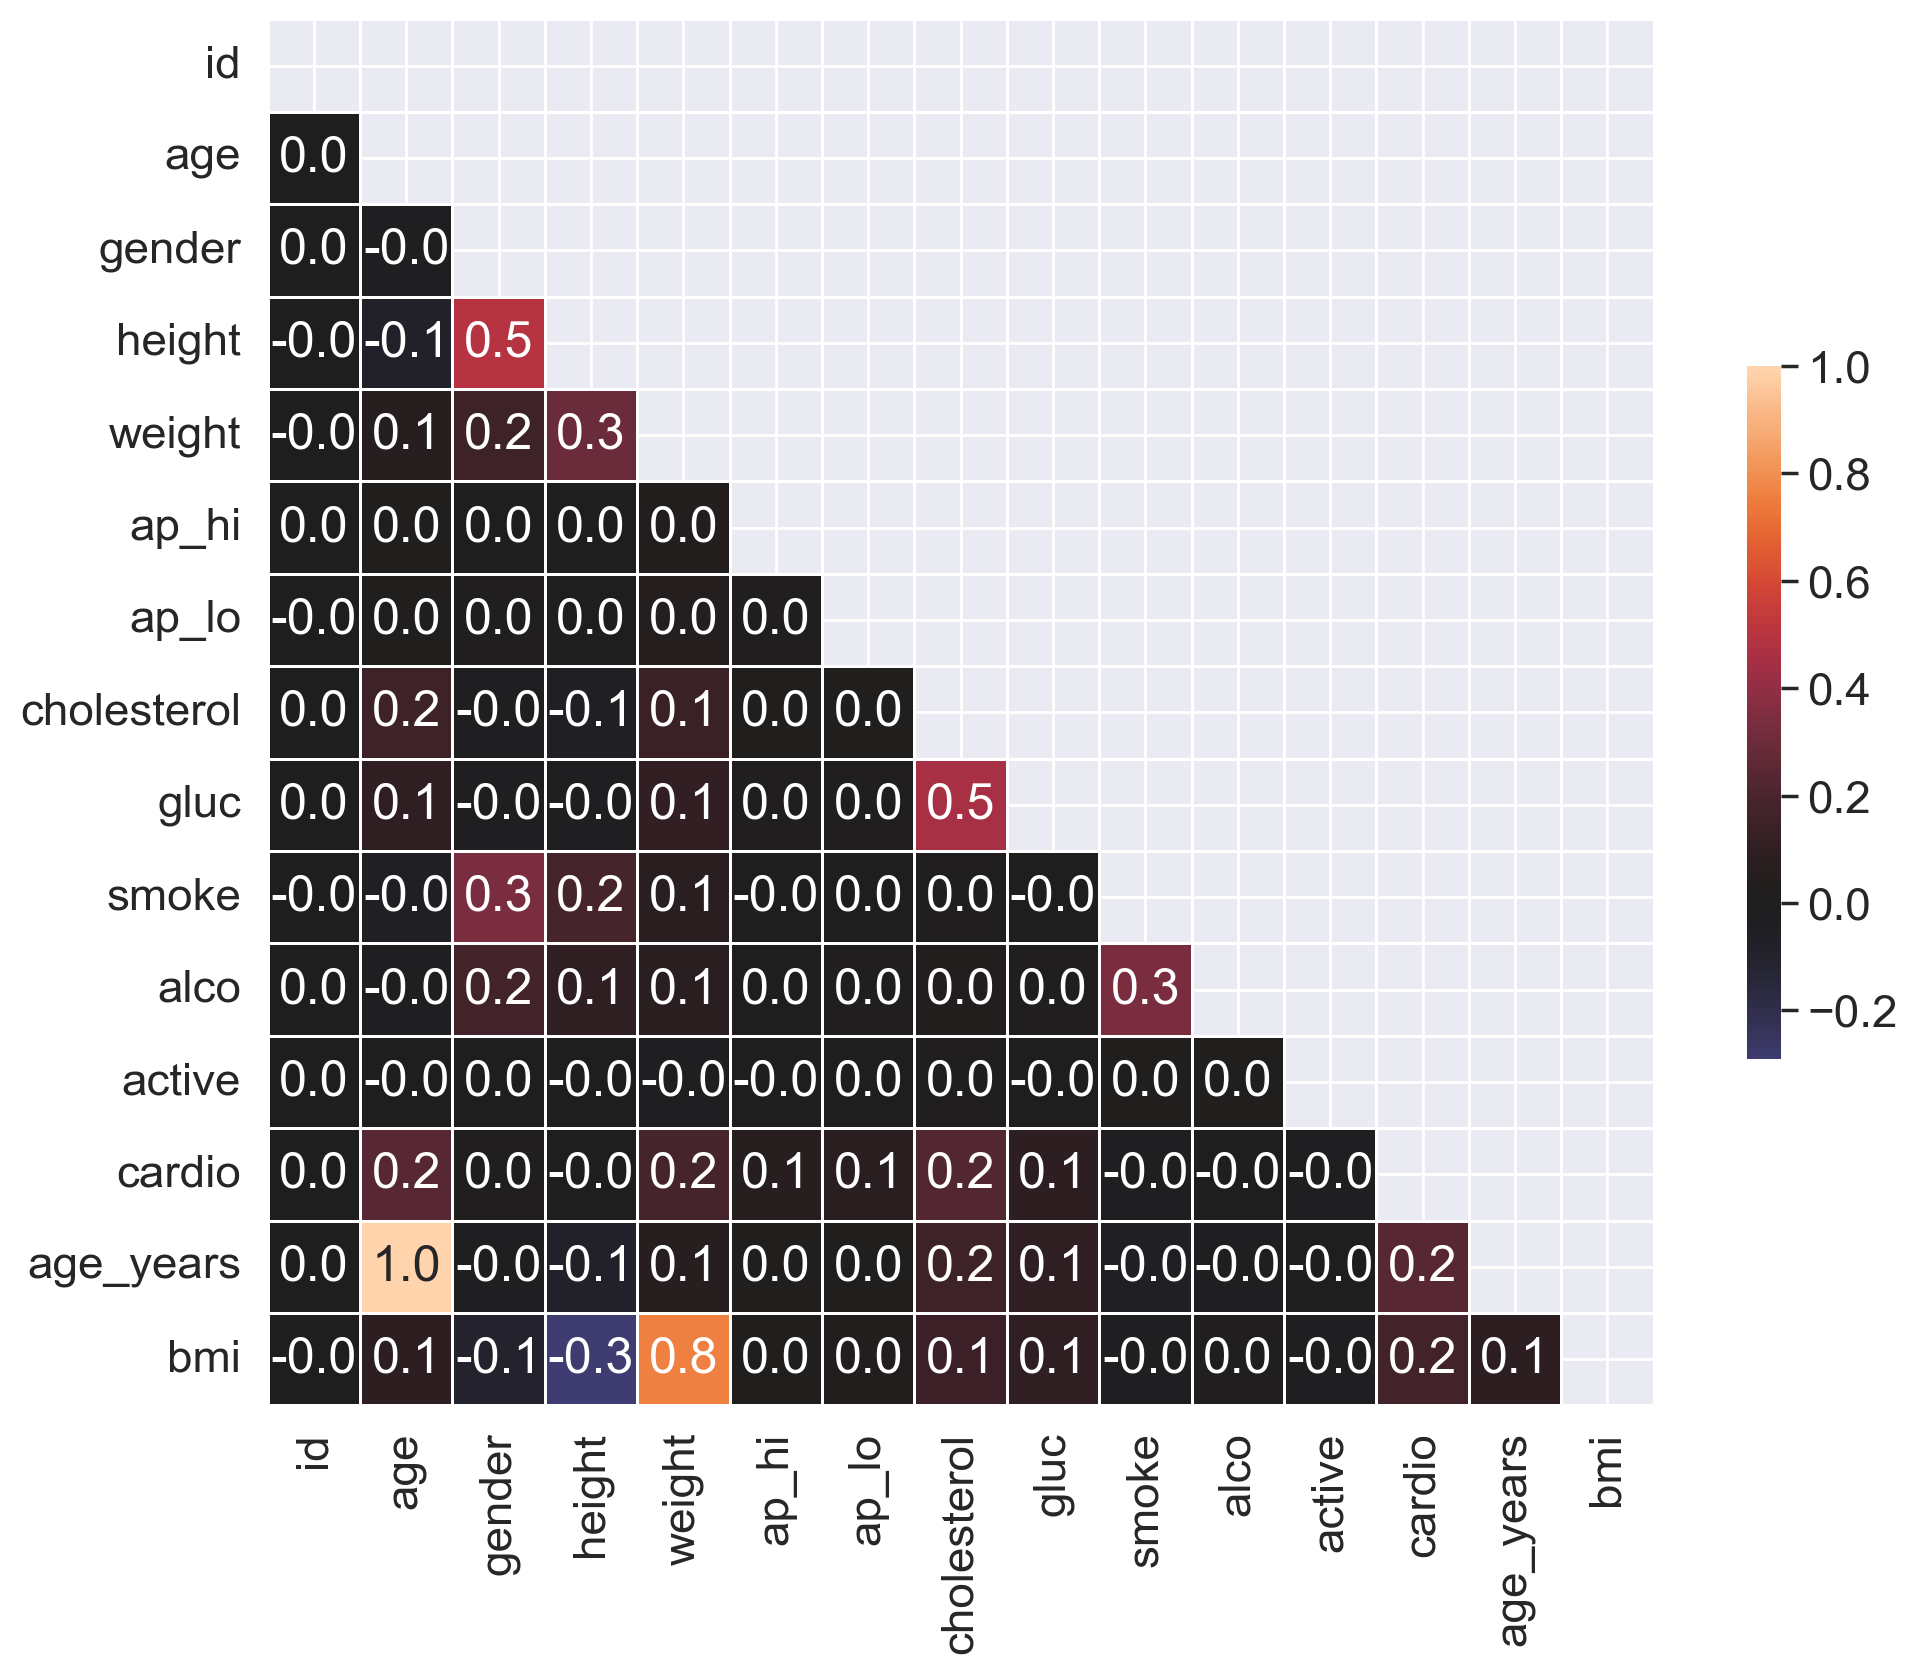

In [30]:
# Calculate the correlation matrix
df = filtered_df.copy()

corr = df.corr(method="pearson")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

### 2.2. Height distribution of men and women

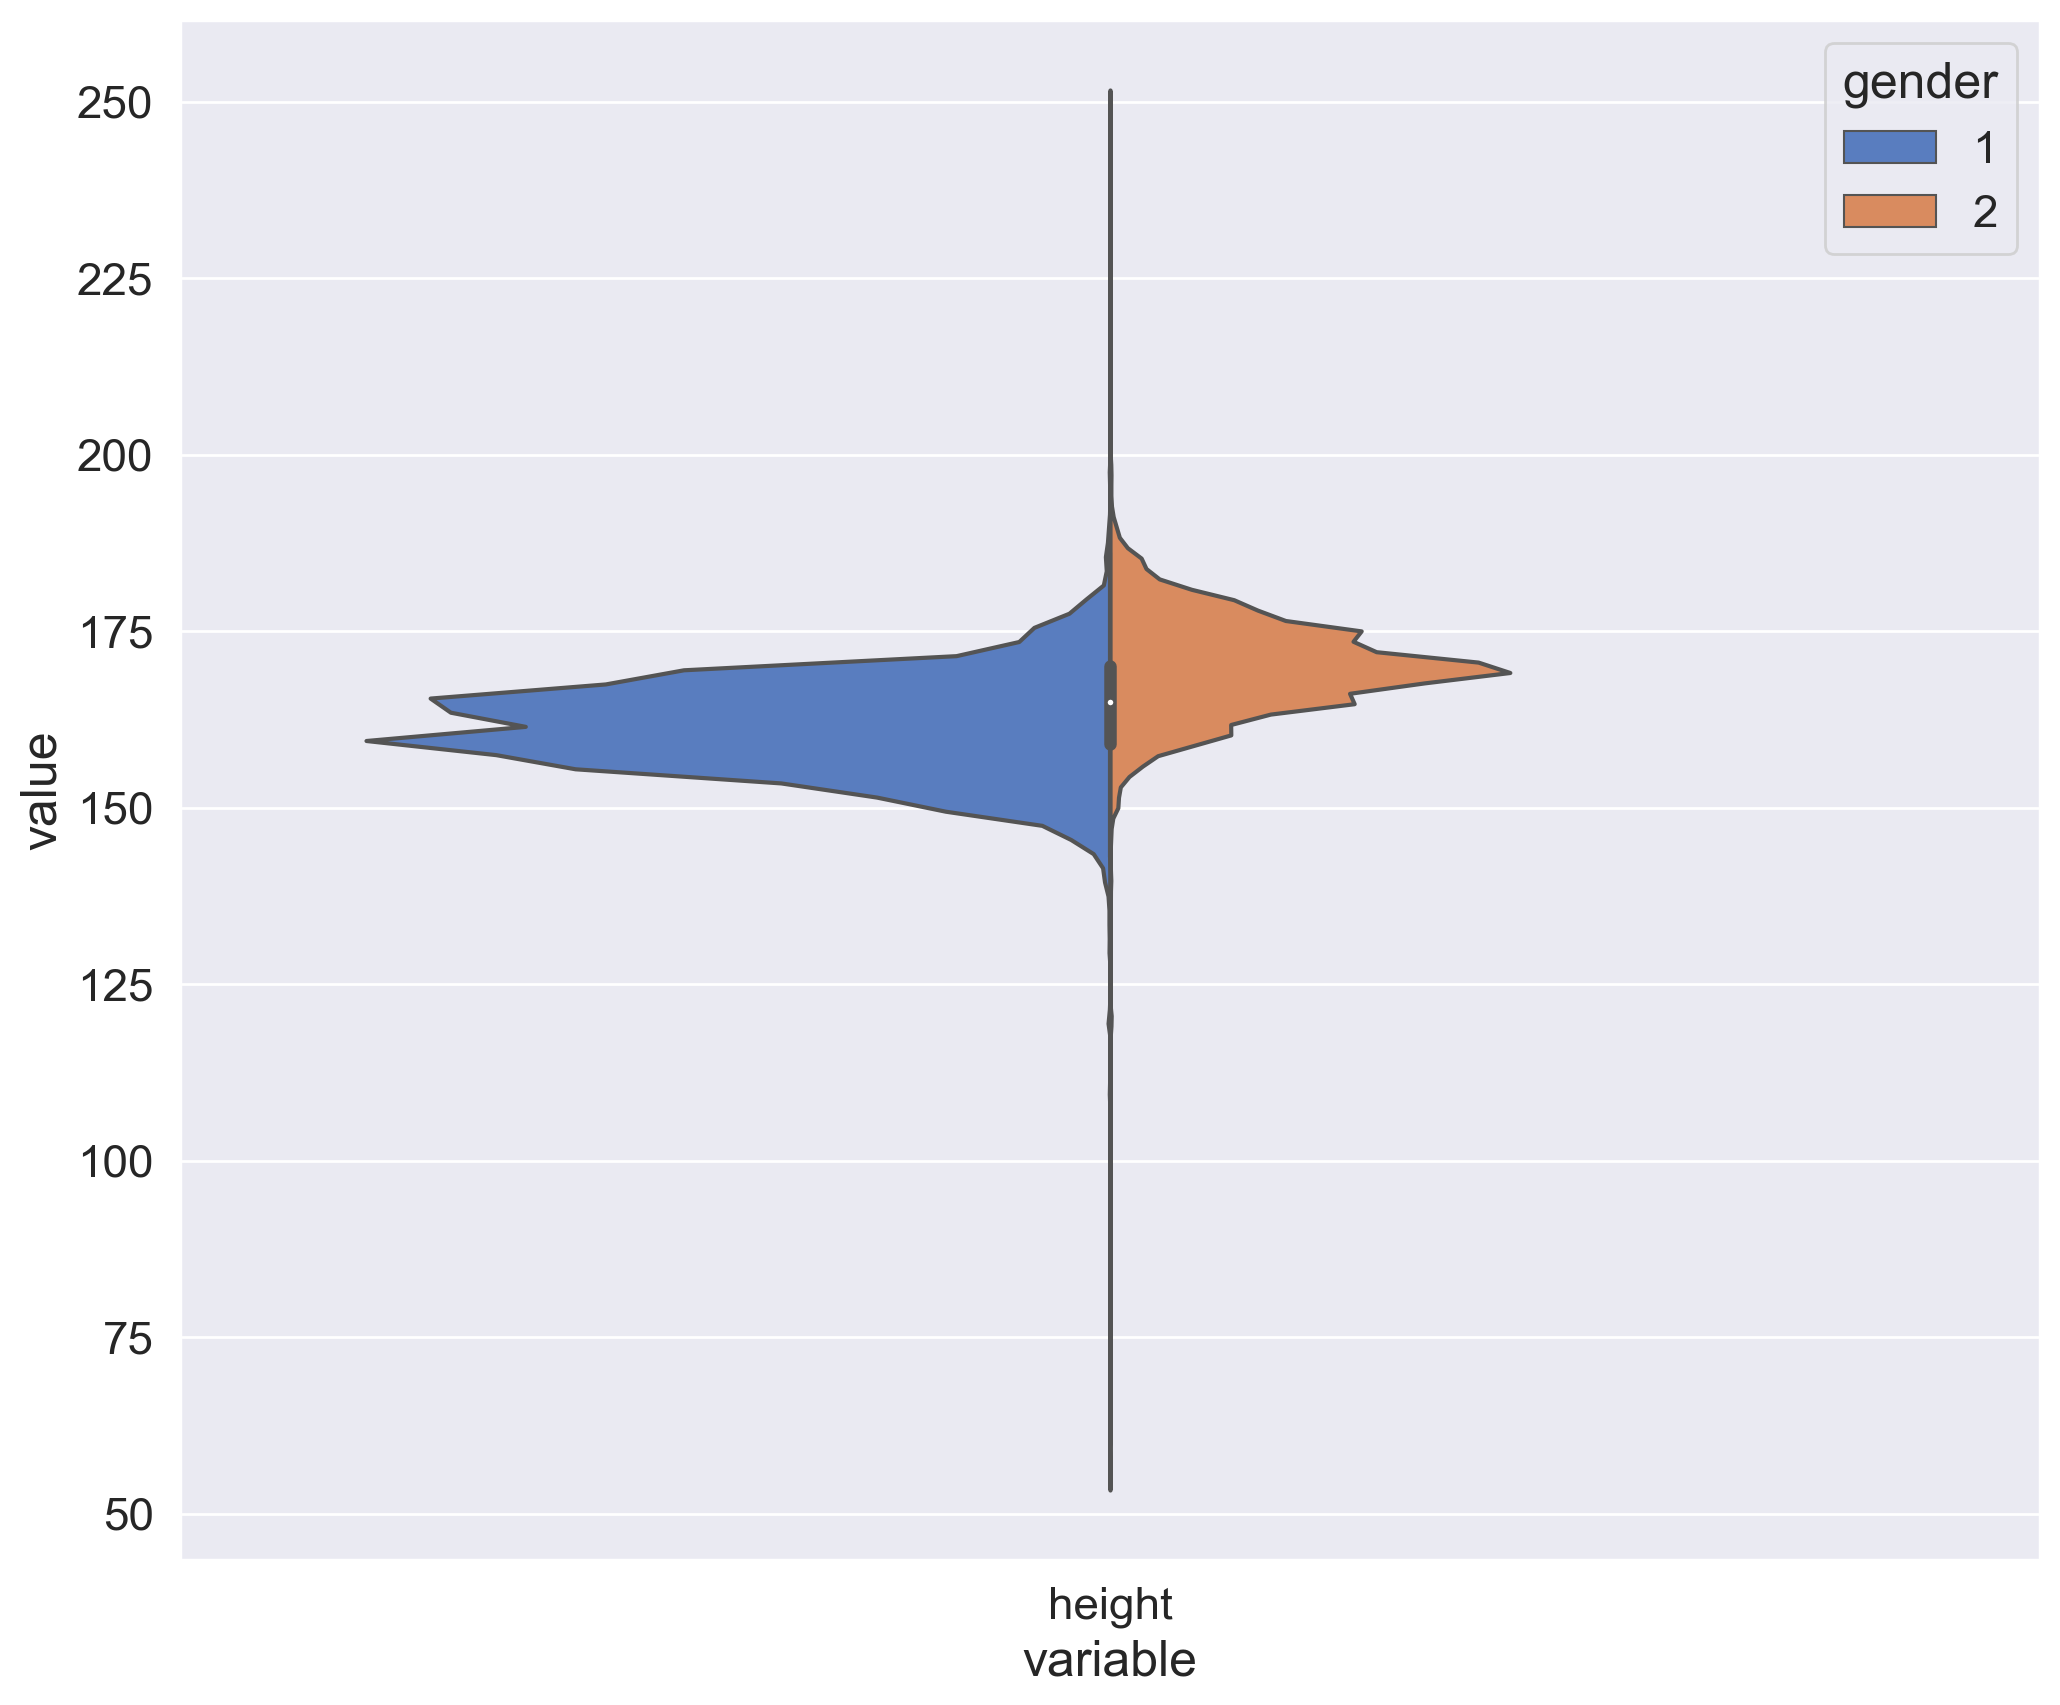

In [31]:
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

### 2.3. Rank correlation

In [33]:
# Calculate the correlation matrix
corr = df[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")
corr

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
id,1.000000,0.002682,-0.001886,-0.001292,0.003258,-0.000238,0.005706,0.002789
age,0.002682,1.000000,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791
height,-0.001886,-0.082292,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369
weight,-0.001292,0.061559,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901
ap_hi,0.003258,0.219087,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334
ap_lo,-0.000238,0.156700,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474
cholesterol,0.005706,0.140113,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803
gluc,0.002789,0.091791,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000


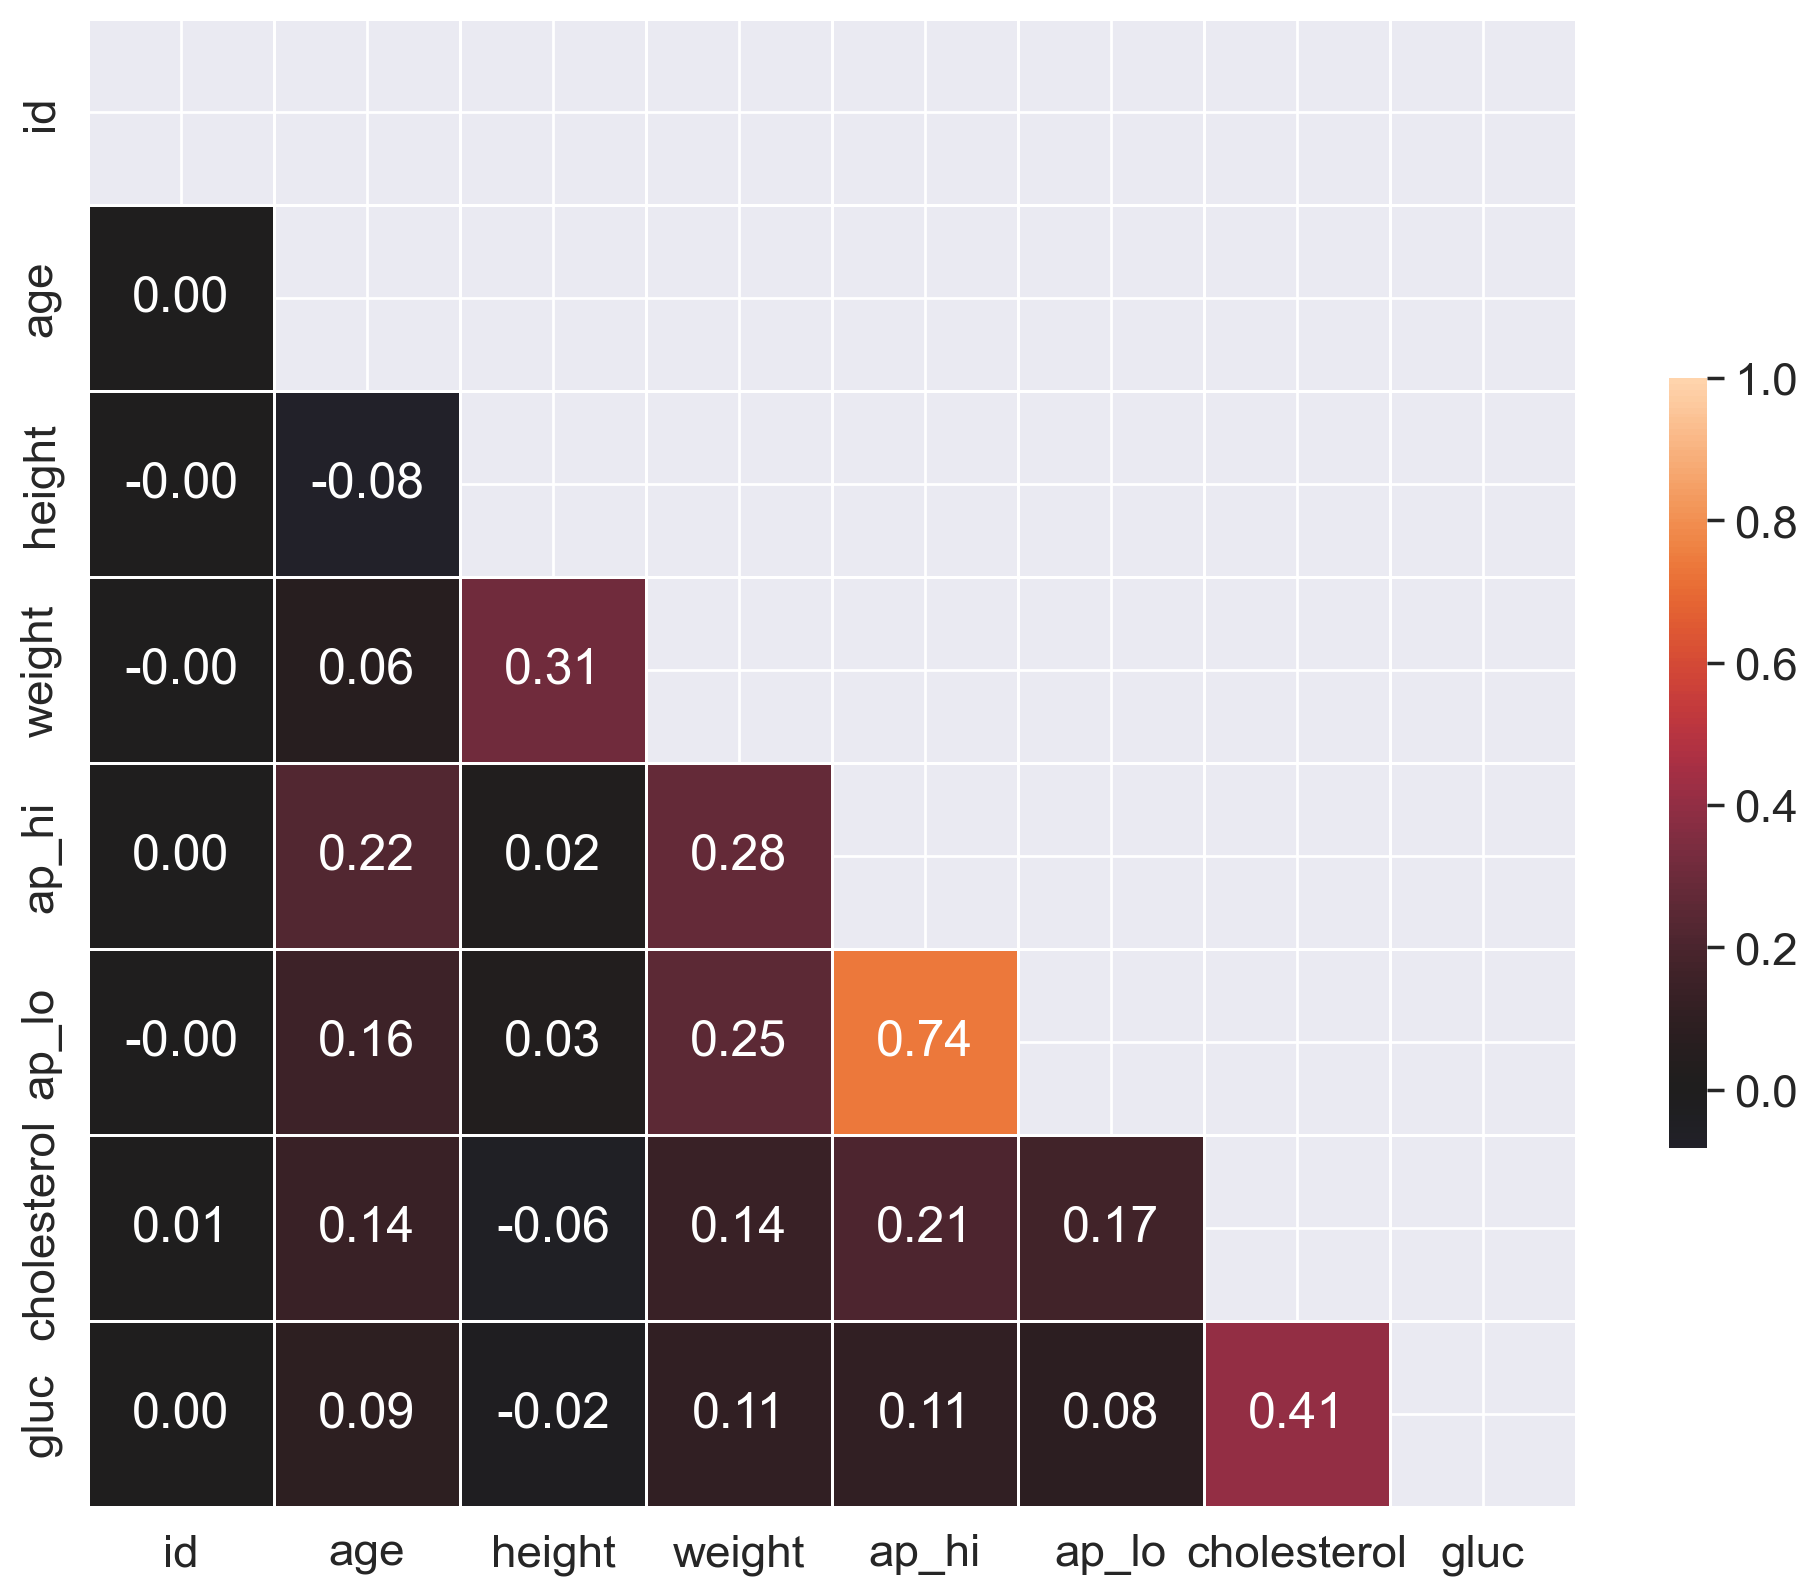

In [34]:
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

### 2.4. Age

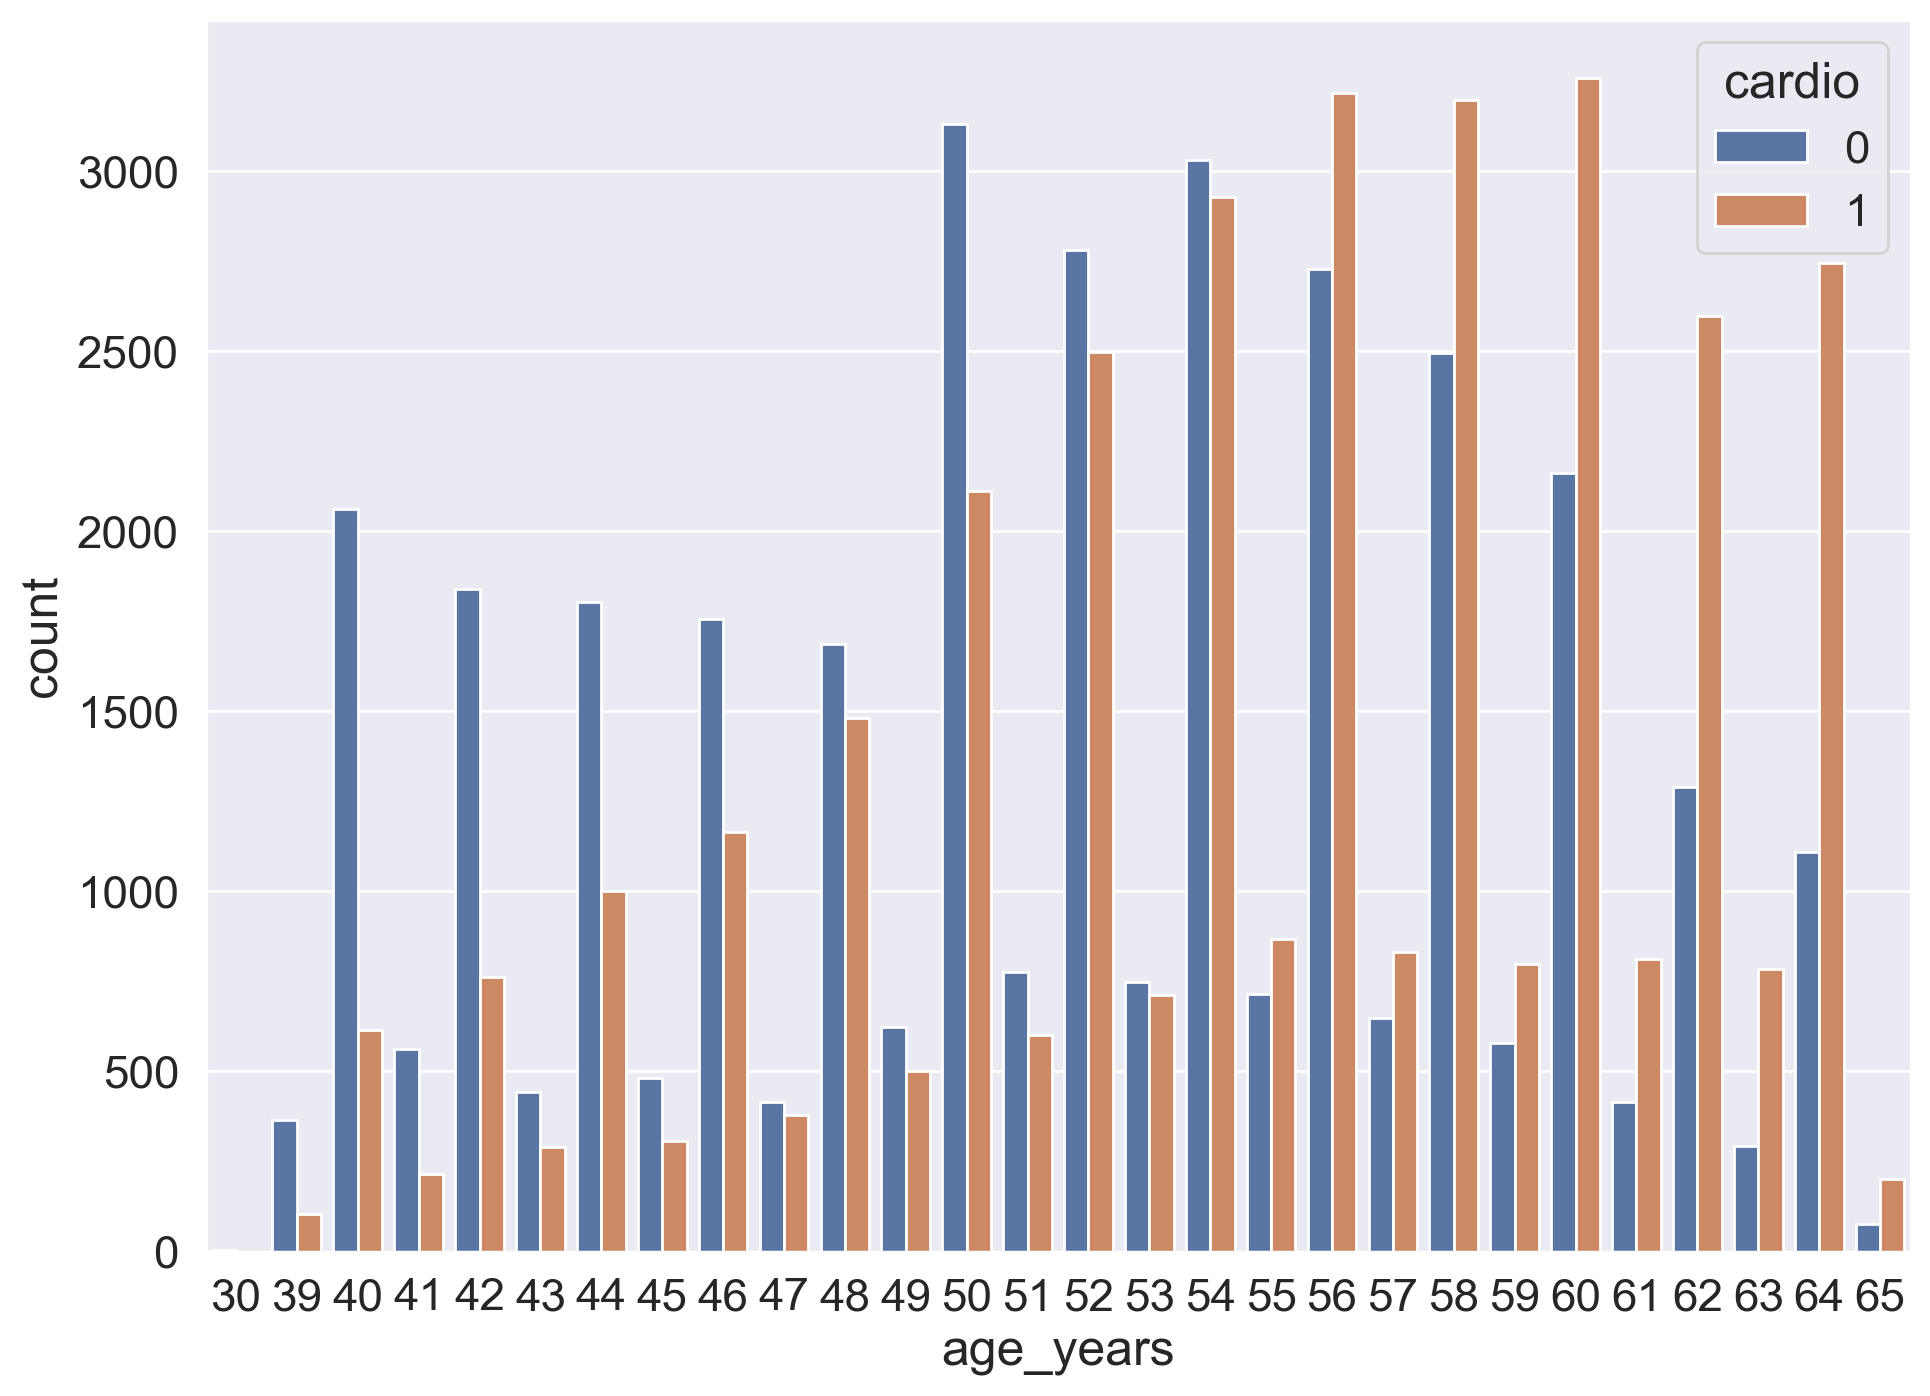

In [36]:
sns.countplot(x="age_years", hue="cardio", data=df);